### Цель исследования:

Необходимо выявить параметры, определяющие влияние на стоимость недвижимости, закономерности и попытаться выяснить, на что необходимо обращать внимание при поиске квартиры в каждом из регионов РФ. 
Выполнение задачи предполагает:<br>

1.  Предобработку данных</a><br>
2.  Исследовательский анализ данных</a><br>
3.  Составление портрета потребителя</a><br>
4.  Исследование статистических показателей</a><br>
5.  Проверка гипотез</a><br>
6.  Выводы</a><br>

Цель этого проекта — выявить, какие признаки больше всего влияют на стоимость квартиры. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению. Набор данных состоит из 13 признаков (11 числовых признака и 2 категориальных признака). 

#### Столбцы данных

- Дата - дата публикации объявления.
- Время — время публикаци объявления.
- Коорданата x - значение координаты (широта).
- Коорданата y - значение координаты (долгота).
- Номер - код региона РФ.
- Тип здания — тип сооружения, в котором находится квартира.
- Тип квартиры - тип квартиры с точки зрения новизны.
- Этаж — номер этажа, на котором находится квартира.
- Комнаты — количество жилых комнат в квартире.
- Площадь - совокупная площадь квартиры.
- Площадь кухни — площадь кухни. 
- Цена - Цена в рублях РФ.

### Шаг 1. Открытие файла с данными и изучение общей информации



### Шаг 2. Подготовка данных

* Проведение анализа данных в столбцах;
* удаление и обработка пропусков;
* преобразование данных в нужные типы;
* работа с дубликатами.

### Шаг 3. Провести исследовательский анализ данных

* Определить, какие регионы лидируют по цене. 
* Определить регионы с самыми низкими ценамии. Для каждого региона найти среднюю цену квартиры.
* Построить график «ящик с усами» по рейтингам в разбивке по регионам, по параметрам.
* Выявить закономерность влияния на цену площади, числа комнат и площади кухни. 
* Построить диаграмму рассеяния и посчитать корреляцию. 
* Выбрать регионы с наибольшими ценами.

### Шаг 4. Составить портрет потребителя каждого региона

Определить для пользователя каждого региона:
* Самые популярные типы квартир;

### Шаг 5. Провести исследование статистических показателей

* Выполнить подсчитать среднего количества, дисперсии и стандартного отклонения для цен на продукт различных регионов. Построить гистограммы. Описать распределения. 
* Построить модель предсказания цены от времени с помощью линейной регрессии.

#  <a name="1">1.Предобработка данных</a>

# Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression

import math

# Загрузка данных

In [2]:
df_pred = pd.read_csv(u'all_v2.csv')
df_pred.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [3]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


Определим значение наших столбцов
`date` - дата публикации объявления; <br>
`time` - время публикаци объявления; <br>
`geo_lat` - значение координаты (широта);<br>
`geo_lo` - значение координаты (долгота);<br>
`region` - код региона РФ;<br>
`building_type` - Тип здания. 0 - Прочее. 1 - Панельный дом. 2 - Монолит. 3 - Кирпичный. 4 - Блочный. 5 - Деревянный; <br>
`object_type` - Тип квартиры. 1 - Вторичное жилье; 11 - Новая квартира в новостройке;<br>
`level` - Этаж, на котором находится квартира; <br>
`levels` - Количество этажей;<br>
`rooms` - Количество жилых комнат. Если значение -1 - это значит, что квартира является "студией";<br>
`area` - Совокупная площадь квартиры;<br>
`kitchen_area` - Площадь кухни; <br>
`price` - Цена в рублях РФ.<br>

# Преобразование типов данных

Чтобы избежать ошибок в данных, преобразуем тип данных `price` в тип float, так как цена квартиры может быть дробной, а также тип данных `region` в строковый тип, чтобы избежать суммирования и других вычислений по категориальным данным (номер региона является категориальным)

In [5]:
df_pred["price"] = df_pred["price"].astype(float)
df_pred["region"] = df_pred["region"].astype(str)
df_pred.dtypes

price            float64
date              object
time              object
geo_lat          float64
geo_lon          float64
region            object
building_type      int64
level              int64
levels             int64
rooms              int64
area             float64
kitchen_area     float64
object_type        int64
dtype: object

# Проверка пропусков в данных

In [7]:
df_pred.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

Пропущенных значений нет

In [8]:
df_pred.isna().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

Nan значений нет

# Приведение данных к адекватному виду

Удаляем нулевые значения в столбце 'price'

In [9]:
df_pred_nullprice = df_pred[df_pred['price'] == 0.0].index
df_pred = df_pred.drop(df_pred_nullprice, axis=0)

Проверим цены на ошибочные отрицательные значения

In [10]:
df_pred['price'].min()    

-2144967296.0

Принято решение о том, что отрицательные значения переданы случайно и знак необходимо заменить на противоположный.

In [11]:
df_pred['price'] = df_pred['price'].abs()
df_pred = df_pred.dropna(how='any',axis=0) 

Проверим другие переменные на ошибочные отрицательные значения

In [12]:
df_pred['rooms'].min()

-2

Количество комнат также задано со знаком минус, аналогично меняем знак на плюс.

In [13]:
df_pred['rooms'] = df_pred['rooms'].abs()

# Поиск выбросов

<Axes: >

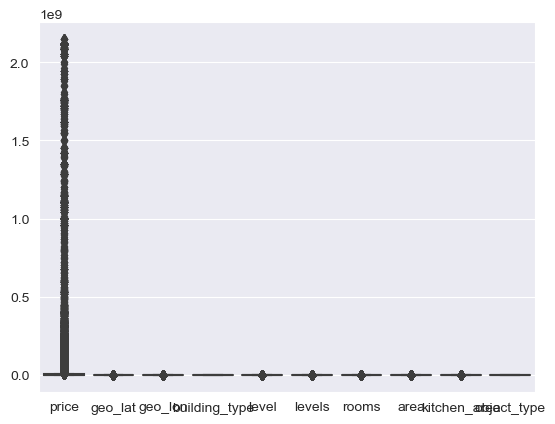

In [15]:
sns.boxplot(df_pred)

Для начала, видим большое количество выбросов по цене.

price    Axes(0.125,0.11;0.775x0.77)
dtype: object

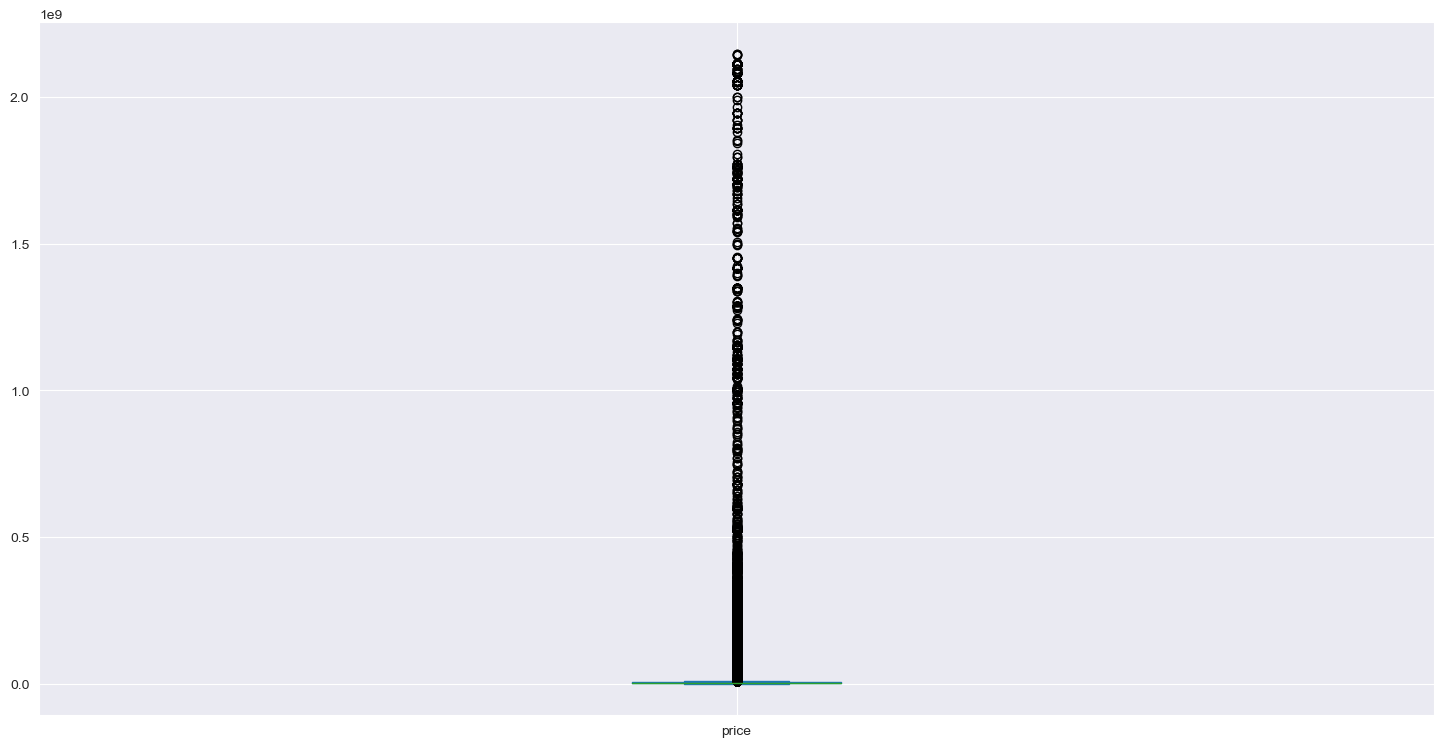

In [17]:
plt.figure(figsize=(18,9))
df_pred.price.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

Удалим нижний и верхний выбросы в столбцах с выбросами, объединив условие с оператором AND

In [18]:
q_low = df_pred["price"].quantile(0.01)       
q_hi  = df_pred["price"].quantile(0.99)

df_pred = df_pred[(df_pred["price"] < q_hi) & (df_pred["price"] > q_low)]

In [19]:
df_pred["price"].describe().round(2) 

count     5363006.00
mean      3996424.22
std       3210606.58
min        750007.00
25%       1951000.00
50%       2996400.00
75%       4778961.50
max      24233000.00
Name: price, dtype: float64

Посмотрим также выбросы по другим параметрам и удалим их в случае необходимости тем же способом.

area    Axes(0.125,0.11;0.775x0.77)
dtype: object

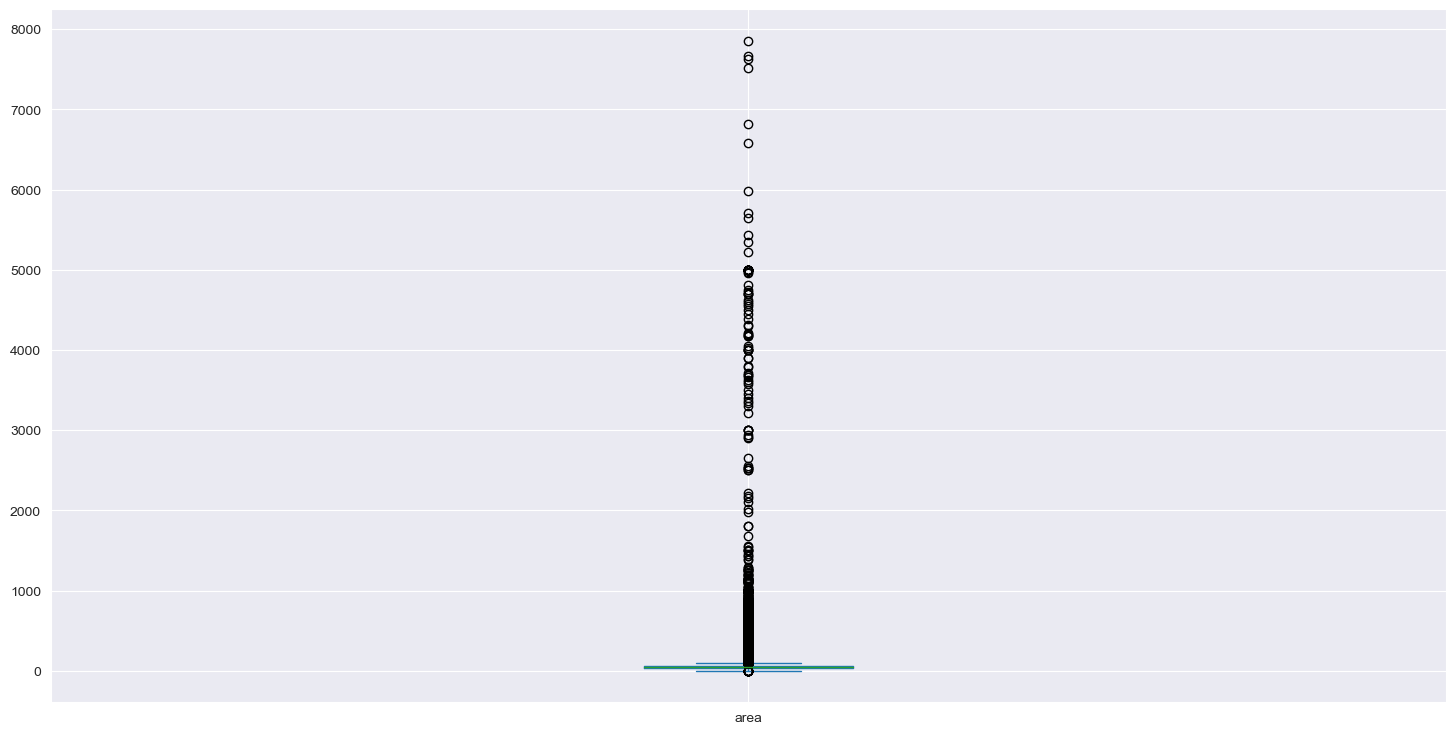

In [21]:
plt.figure(figsize=(18,9))
df_pred.area.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

С выбросами поступим точно также

In [22]:
q_low = df_pred['area'].quantile(0.01)
q_hi  = df_pred['area'].quantile(0.99)

df_pred = df_pred[(df_pred['area'] < q_hi) & (df_pred['area'] > q_low)]

In [23]:
df_pred['area'].describe().round(2) 

count    5247700.00
mean          52.35
std           18.55
min           20.01
25%           38.60
50%           48.02
75%           63.00
max          125.94
Name: area, dtype: float64

kitchen_area    Axes(0.125,0.11;0.775x0.77)
dtype: object

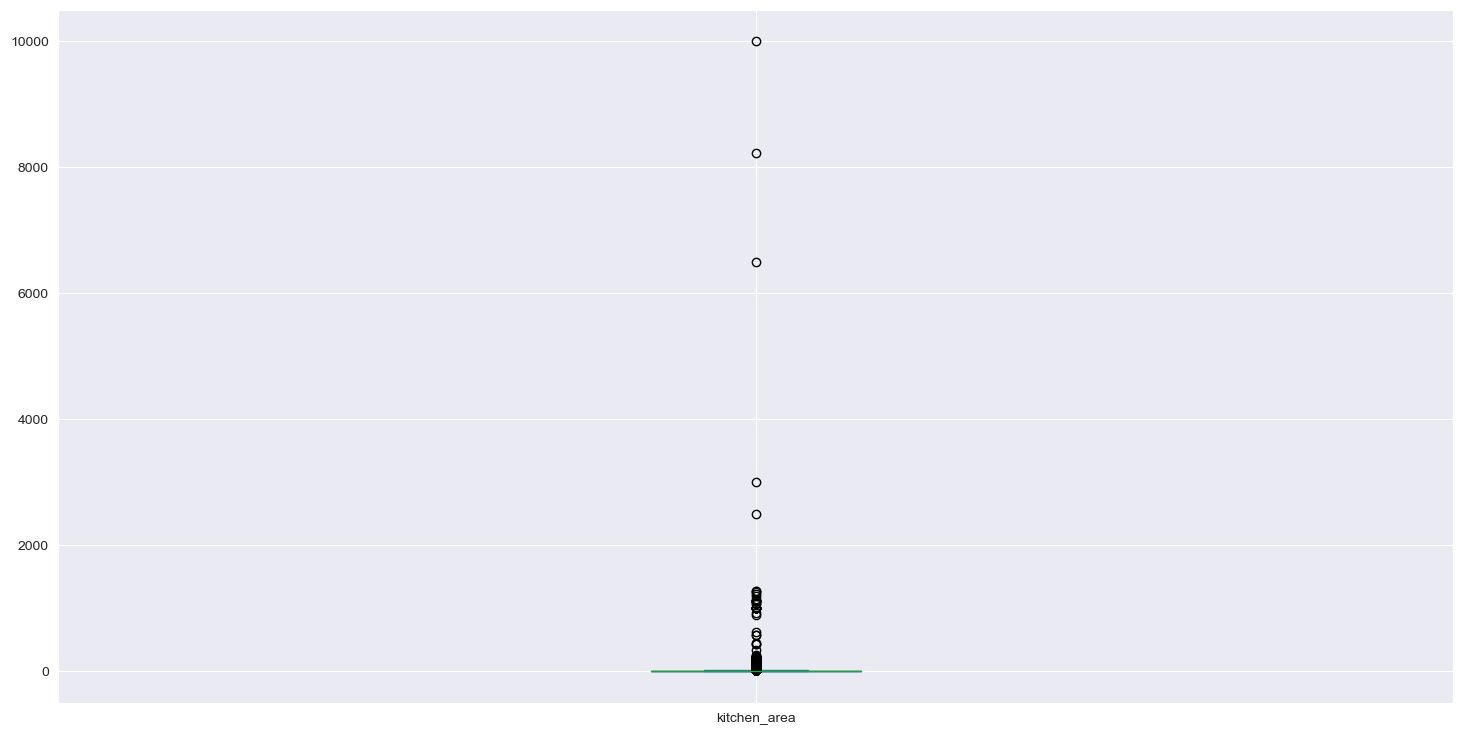

In [24]:
plt.figure(figsize=(18,9))
df_pred.kitchen_area.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

In [26]:
q_low = df_pred["kitchen_area"].quantile(0.01)
q_hi  = df_pred["kitchen_area"].quantile(0.99)

df_pred = df_pred[(df_pred["kitchen_area"] < q_hi) & (df_pred["kitchen_area"] > q_low)]

In [26]:
df_pred = df_pred.reindex(columns=['date', 'time', 'geo_lat', 'geo_lon', 'region', 'price', 'object_type', 'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area'])    # Изменим порядок столбцов для удобства

# Проверим наличие дубликатов

In [27]:
df_pred.duplicated().sum()

1393

Дубликатов не очень много, поэтому было принято решение их удалить.

In [28]:
df = df_pred.drop_duplicates()

# Продолжение приведения данных к адекватным

In [31]:
df.region.describe()  

count     5132041
unique         84
top          9654
freq       986296
Name: region, dtype: object

Значения данного столбца выглядят подозрительными, поскольку на момент составления датасета в РФ насчитывалось 84 субъекта, а в данных присутствует большое количество четырёхзначных значений. Номера не соответствуют номерам регионов РФ.

In [29]:
df.region.unique()

array(['2661', '81', '2871', '2843', '3', '3106', '2922', '2900', '2722',
       '6171', '3230', '4417', '5282', '5368', '3446', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873', '2594', '8509', '11416', '11991',
       '5178', '13913', '6309', '5952', '6543', '2880', '5993', '2484',
       '4240', '5789', '14880', '1491', '2885', '5794', '2528', '4374',
       '4695', '2328', '5143', '6937', '2806', '14368', '5736', '7121',
       '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
       '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
       '4963', '1901', '61888'], dtype=object)

Пользуясь простейшим способом поиска названия регионов по координатам ('geo_lat', 'geo_lon'), были вписаны все значения в словарь 'region_name' в соответствии с номером региона.

In [30]:
region_name = {
    '2661': 'Санкт-Петербург',
    '3446': 'Ленинградская область', 
    '3': 'Москва',
    '81': 'Московская область',
    '2843': 'Краснодарский край',
    '2871': 'Нижегородская область',
    '3230': 'Ростовская область',
    '3106': 'Самарская область',
    '2922': 'Республика Татарстан',
    '2900': 'Ставропольский край',
    '2722': 'Республика Башкортостан',
    '6171': 'Свердловская область', 
    '4417': 'Республика Коми', 
    '5282': 'Челябинская область', 
    '5368': 'Иркутская область', 
    '5520': 'Пермский край', 
    '6817': 'Алтайский край',
    '9579': 'Республика Бурятия',
    '2604': 'Ярославская область',
    '1010': 'Удмуртская Республика',
    '7793': 'Псковская область',
    '13919': 'Республика Северная Осетия — Алания',
    '2860': 'Кемеровская область',
    '3019': 'Чувашская Республика',
    '4982': 'Республика Марий Эл',
    '9648': 'Кабардино-Балкарская Республика',
    '5241': 'Республика Мордовия',
    '3870': 'Красноярский край',
    '3991': 'Тюменская область',
    '2359': 'Республика Хакасия',
    '9654': 'Новосибирская область',
    '2072': 'Воронежская область',
    '8090': 'Республика Карелия',
    '4007': 'Республика Дагестан',
    '11171': 'Республика Саха (Якутия)',
    '10160': 'Забайкальский край',
    '7873, 6937': 'Республика Крым',
    '2594': 'Кировская область',
    '8509': 'Республика Калмыкия',
    '11416': 'Республика Адыгея',
    '11991': 'Карачаево-Черкесская Республика',
    '5178': 'Республика Тыва',
    '13913': 'Республика Ингушетия',
    '6309': 'Республика Алтай',
    '5952': 'Белгородская область',
    '6543': 'Архангельская область',
    '2880': 'Тверская область',
    '5993': 'Пензенская область',
    '2484': 'Ханты-Мансийский автономный округ',
    '4240': 'Липецкая область',
    '5789': 'Владимирская область',
    '14880': 'Ямало-Ненецкий автономный округ',
    '1491': 'Рязанская область',
    '2885': 'Чеченская Республика',
    '5794': 'Смоленская область',
    '2528': 'Саратовская область',
    '4374': 'Вологодская область',
    '4695': 'Волгоградская область',
    '2328': 'Калужская область',
    '5143': 'Тульская область',
    '2806': 'Тамбовская область',
    '14368': 'Мурманская область',
    '5736': 'Новгородская область',
    '7121': 'Курская область',
    '4086': 'Хабаровский край',
    '821': 'Брянская область',
    '10582': 'Астраханская область',
    '7896': 'Калининградская область',
    '8640': 'Омская область',
    '5703': 'Курганская область',
    '10201': 'Томская область',
    '4249': 'Ульяновская область',
    '3153': 'Оренбургская область',
    '4189': 'Костромская область',
    '2814': 'Орловская область',
    '13098': 'Камчатский край',
    '8894': 'Ивановская область',
    '7929': 'Амурская область',
    '16705': 'Магаданская область',
    '69': 'Еврейская автономная область',
    '4963': 'Приморский край',
    '1901': 'Сахалинская область',
    '61888': 'Ненецкий автономный округ'
}

In [31]:
df['region_name'] = df['region'].map(region_name)

C:\Users\mrrr_\AppData\Local\Temp\ipykernel_20332\198002278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region_name'] = df['region'].map(region_name)


In [138]:
df.to_csv('название_файла.csv', index=False)

Общую информацию о рынке недвижимости в России было решено визуализировать с помощью дашборда в приложении PowerBI.

#  <a name="2"> 2. Исследовательский анализ данных</a>


# Выявление для каждого из исследуемых регионов средней, максимальной, минимальной цены продукта

In [150]:
a = df.groupby('region_name', as_index=False).agg(avg_price = ("price", "mean")).round(2)
a.sort_values(by='avg_price', ascending=False)

,region_name,avg_price
29,Москва,10135983.31
62,Санкт-Петербург,6640542.89
30,Московская область,4706433.86
1,Амурская область,4596808.29
32,Ненецкий автономный округ,4425000.0
...,...,...
42,Псковская область,1994471.98
52,Республика Марий Эл,1985905.38
77,Челябинская область,1966574.72
43,Республика Адыгея,1891666.79


In [151]:
b = df.groupby('region_name', as_index=False).agg(max_price = ("price", "max"))
b.sort_values(by='max_price', ascending=False)

,region_name,max_price
29,Москва,24232362.0
62,Санкт-Петербург,24225000.0
56,Республика Татарстан,24225000.0
72,Тюменская область,24180000.0
65,Свердловская область,24126000.0
...,...,...
31,Мурманская область,7900000.0
34,Новгородская область,6800000.0
64,Сахалинская область,6500000.0
32,Ненецкий автономный округ,6000000.0


In [152]:
c = df.groupby('region_name', as_index=False).agg(min_price = ("price", "min"))
c.sort_values(by='min_price', ascending=False)

,region_name,min_price
32,Ненецкий автономный округ,3000000.0
64,Сахалинская область,1200000.0
17,Камчатский край,980000.0
10,Еврейская автономная область,900000.0
41,Приморский край,800000.0
...,...,...
9,Воронежская область,751824.0
59,Ростовская область,751000.0
51,Республика Коми,750555.0
14,Кабардино-Балкарская Республика,750500.0


# Определение лидеров бюджетного ценового сегмента

In [40]:
cheapest = df.sort_values(by = 'price', ascending=True)
cheapest[['region_name', 'price']].head(10)

,region_name,price
1628562,Краснодарский край,750400.0
128955,Кабардино-Балкарская Республика,750500.0
737057,Республика Коми,750555.0
806944,Ростовская область,751000.0
3378848,Воронежская область,751824.0
3447298,Воронежская область,751824.0
4390544,Ростовская область,752000.0
274352,Кабардино-Балкарская Республика,752000.0
4185050,Воронежская область,752760.0
638661,Челябинская область,753000.0


Лидерами по самой низкой цене на квартиру являются 5 регионов: Нижегородская область, Ростовская область, Краснодарский край, Воронежская область, Красноярский край

# ****Корреляции (Уровень зависимости одного параметра от другого)****

Выявление наличия или отсутствия зависимости стоимости квартиры от количества комнат

Набор данных очень большой, в нем более 5 млн наблюдений

*Россия очень большая страна, и для меня имеет смысл проанализировать рынок недвижимости по отдельным регионам.*
*Мы выбрали для анализа Санкт-Петербург*

In [62]:
df_spb = df[df.region_name == 'Санкт-Петербург'].copy()
df_spb.sample(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,region_name
2176874,3350000.0,2019-07-10,02:22:19,59.758046,30.626694,2661,2,5,5,1,36.0,10.0,1,Санкт-Петербург
1915865,4500000.0,2019-06-01,11:08:47,59.884070,29.863353,2661,3,1,2,2,65.0,18.6,1,Санкт-Петербург
5184214,15852495.0,2021-03-19,11:52:31,59.958230,30.263227,2661,2,7,8,1,49.7,16.0,1,Санкт-Петербург
2396056,4100000.0,2019-08-15,13:50:13,60.081960,30.350507,2661,3,22,27,1,40.0,9.0,11,Санкт-Петербург
4277399,4800000.0,2020-08-22,19:15:46,60.051262,30.355289,2661,1,4,9,1,38.0,7.9,1,Санкт-Петербург
313198,5500000.0,2018-10-20,22:11:23,60.039327,30.347359,2661,1,9,9,2,58.0,8.0,1,Санкт-Петербург
875731,3890000.0,2019-01-01,08:37:29,60.049458,30.390559,2661,1,3,9,2,46.0,6.3,1,Санкт-Петербург
4811976,9300000.0,2020-12-06,10:46:22,59.944215,30.350372,2661,3,3,7,2,63.0,7.2,1,Санкт-Петербург
4351666,9349000.0,2020-09-08,06:40:34,59.820617,30.341308,2661,0,2,17,3,80.7,14.7,1,Санкт-Петербург
4969360,5800000.0,2021-01-28,11:28:46,60.020220,30.225789,2661,1,5,12,1,38.5,10.0,1,Санкт-Петербург


In [63]:
print('Корреляция между ценой и количеством комнат: ',df_spb['price'].corr(df_spb['rooms']))

Корреляция между ценой и количеством комнат:  0.5158127487126954


In [64]:
print('Корреляция между ценой и площадью квартиры: ',df_spb['price'].corr(df_spb['area']))

Корреляция между ценой и площадью квартиры:  0.7527864086349262


In [65]:
#удалим категориальные переменные и покажем матрицу корреляций
df_spb.drop(['date', 'time', 'geo_lat', 'geo_lon', 'region', 'region_name'], axis= 1 , inplace= True)

In [68]:
df_spb.corr()

,price,building_type,level,levels,rooms,area,kitchen_area,object_type
price,1.000000,0.076631,-0.051384,-0.105662,0.515813,0.752786,0.460613,-0.011894
building_type,0.076631,1.000000,-0.071501,-0.127375,0.028237,0.059130,0.006012,-0.024435
level,-0.051384,-0.071501,1.000000,0.605366,-0.139434,-0.079104,0.108506,0.166128
levels,-0.105662,-0.127375,0.605366,1.000000,-0.215724,-0.112934,0.218123,0.318075
rooms,0.515813,0.028237,-0.139434,-0.215724,1.000000,0.804217,0.112511,-0.146150
area,0.752786,0.059130,-0.079104,-0.112934,0.804217,1.000000,0.411579,-0.075835
kitchen_area,0.460613,0.006012,0.108506,0.218123,0.112511,0.411579,1.000000,0.338355
object_type,-0.011894,-0.024435,0.166128,0.318075,-0.146150,-0.075835,0.338355,1.000000


In [70]:
mask = np.zeros_like(df_spb.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

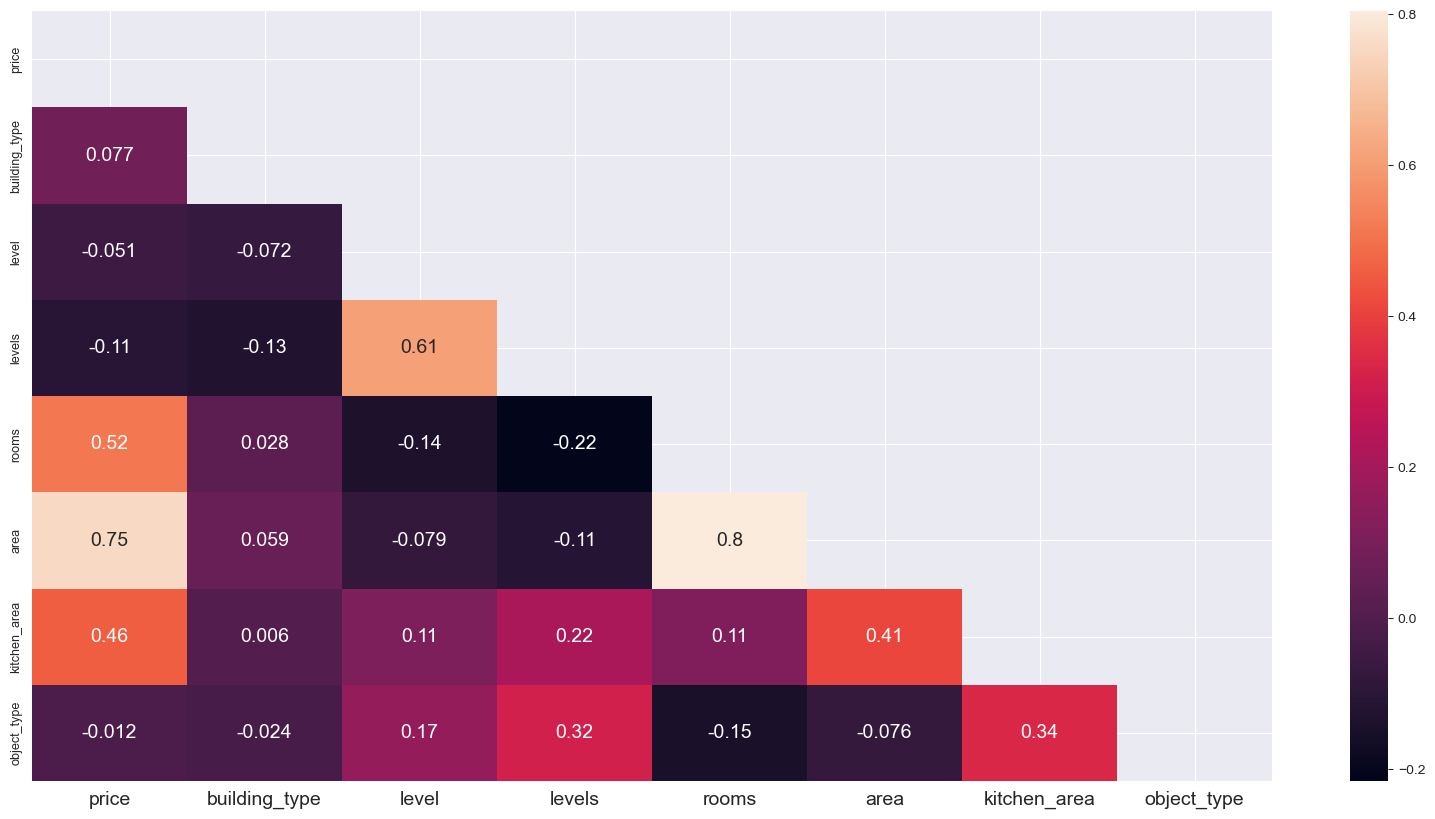

In [71]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_spb.corr(), mask=mask, annot=True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=9)
plt.show()

Видим яркое влияние числа комнат, площади квартиры и площади кухни на цену.

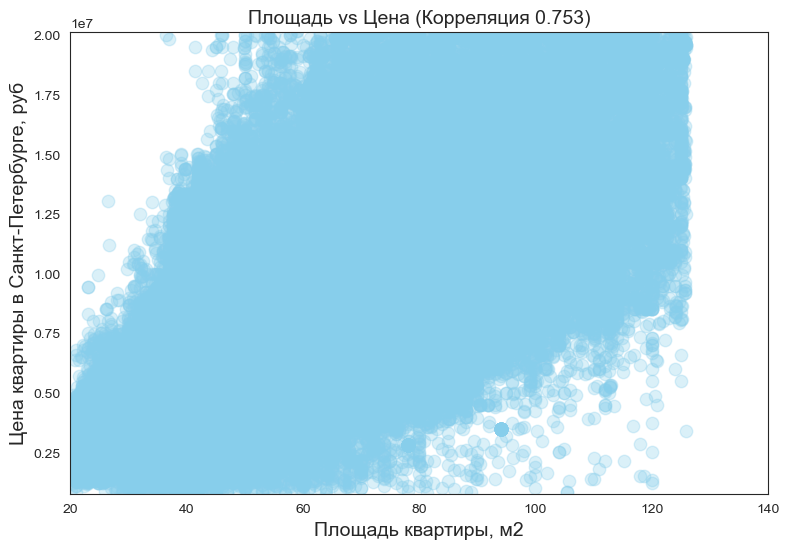

In [73]:
rm_tgt_corr = round(df_spb['area'].corr(df_spb['price']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=df_spb['area'], y=df_spb['price'], alpha=0.3, s=80, color='skyblue')

plt.title(f'Площадь vs Цена (Корреляция {rm_tgt_corr})', fontsize=14)
plt.xlabel('Площадь квартиры, м2', fontsize=14)
plt.ylabel('Цена квартиры в Санкт-Петербурге, руб', fontsize=14)
plt.xlim(20, 140)
plt.ylim(770000, 20150000)
plt.show()

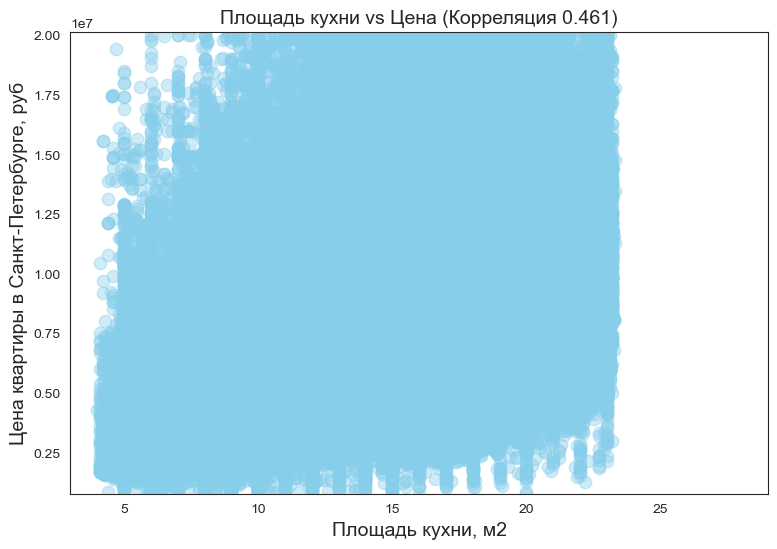

In [74]:
rm_tgt_corr = round(df_spb['kitchen_area'].corr(df_spb['price']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=df_spb['kitchen_area'], y=df_spb['price'], alpha=0.4, s=80, color='skyblue')

plt.title(f'Площадь кухни vs Цена (Корреляция {rm_tgt_corr})', fontsize=14)
plt.xlabel('Площадь кухни, м2', fontsize=14)
plt.ylabel('Цена квартиры в Санкт-Петербурге, руб', fontsize=14)
plt.xlim(3, 29)
plt.ylim(770000, 20150000)
plt.show()

# Мы видим небольшую корреляцию площади кухни с ценой

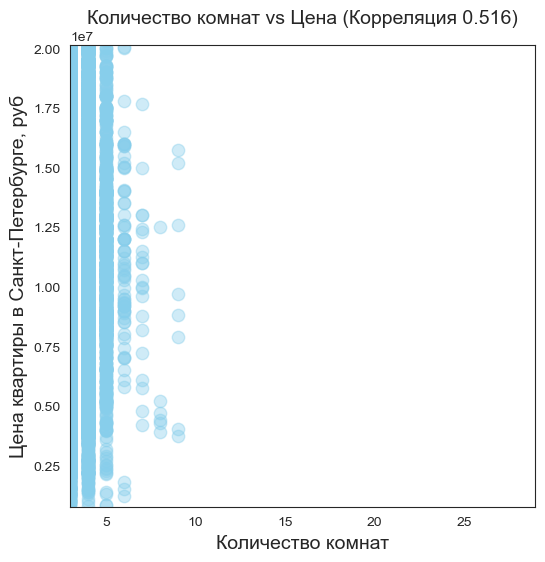

In [78]:
rm_tgt_corr = round(df_spb['rooms'].corr(df_spb['price']), 3)

plt.figure(figsize=(6, 6))
plt.scatter(x=df_spb['rooms'], y=df_spb['price'], alpha=0.4, s=80, color='skyblue')

plt.title(f'Количество комнат vs Цена (Корреляция {rm_tgt_corr})', fontsize=14)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Цена квартиры в Санкт-Петербурге, руб', fontsize=14)
plt.xlim(3, 29)
plt.ylim(770000, 20150000)
plt.show()

#  <a name="3">3. Составление портрета потребителя</a>

Удобнее всего составить портрет потребителя каждого региона с помощью PowerBI, что и было сделано в данной работе.

#  <a name="4"> 4. Исследование статистических показателей.</a>

# Выполнить подсчет среднего количества, дисперсии и стандартного отклонения для цен на продукт различных регионов. Построить гистограммы.

Выведем информацию о среднем количестве цен (объявлений) по квартирам для каждого региона

In [79]:
df.groupby(['region_name'])['price'].agg(pd.Series.count)

region_name
Алтайский край                      66730
Амурская область                     2088
Архангельская область                3744
Астраханская область                 1627
Белгородская область                46514
                                    ...  
Челябинская область                145368
Чеченская Республика                 2060
Чувашская Республика                53610
Ямало-Ненецкий автономный округ       340
Ярославская область                 99110
Name: price, Length: 82, dtype: int64

Выведем информацию о средних значениях для цен по квартирам для каждого региона

In [80]:
df.groupby(['region_name'])['price'].agg(pd.Series.mean).round(2)

region_name
Алтайский край                     2261032.32
Амурская область                   4596808.29
Архангельская область              3742173.27
Астраханская область               2808902.51
Белгородская область               3200251.58
                                      ...    
Челябинская область                1966574.72
Чеченская Республика               2663215.31
Чувашская Республика               2315253.47
Ямало-Ненецкий автономный округ    3975508.84
Ярославская область                2510020.45
Name: price, Length: 82, dtype: float64

Выведем информацию о дисперсии для цен по квартирам для каждого региона

In [81]:
pd.set_option('display.float_format', str)

print(df.groupby(['region_name'])['price'].agg(pd.Series.var).round(2))
print('\n' 'Средняя дисперсия  = ', (df.groupby(['region_name'])['price'].agg(pd.Series.var)).round(2).mean()) 

region_name
Алтайский край                    1115600617133.47
Амурская область                  3387660895253.89
Архангельская область             2152067319053.71
Астраханская область              2164291869893.42
Белгородская область              1819432393270.58
                                        ...       
Челябинская область                771806251416.86
Чеченская Республика              2128550427620.46
Чувашская Республика              1296245002076.33
Ямало-Ненецкий автономный округ    4480697422912.9
Ярославская область               1531562601443.39
Name: price, Length: 82, dtype: float64

Средняя дисперсия  =  2213022843217.472


Мы наблюдаем довольно высокую дисперсию и соответственно сильный разброс отклонений в значениях цен на квартиры.

Выведем информацию о стандартном отклонении для цен по квартирам для каждого региона

In [82]:
print(df.groupby(['region_name'])['price'].agg(pd.Series.std).round(2))
print('\n' 'Среднее отклонение  = ', (df.groupby(['region_name'])['price'].agg(pd.Series.std)).round(2).mean())

region_name
Алтайский край                    1056219.97
Амурская область                  1840559.94
Архангельская область             1466992.61
Астраханская область              1471153.24
Белгородская область              1348863.37
                                     ...    
Челябинская область                878525.04
Чеченская Республика              1458955.25
Чувашская Республика              1138527.56
Ямало-Ненецкий автономный округ   2116765.79
Ярославская область               1237563.17
Name: price, Length: 82, dtype: float64

Среднее отклонение  =  1393082.0878048784


Мы наблюдаем существенный разброс отклонений в значениях цен на квартиры

# Построим гистограммы на основании полученных значений

Text(0, 0.5, 'Регионы')

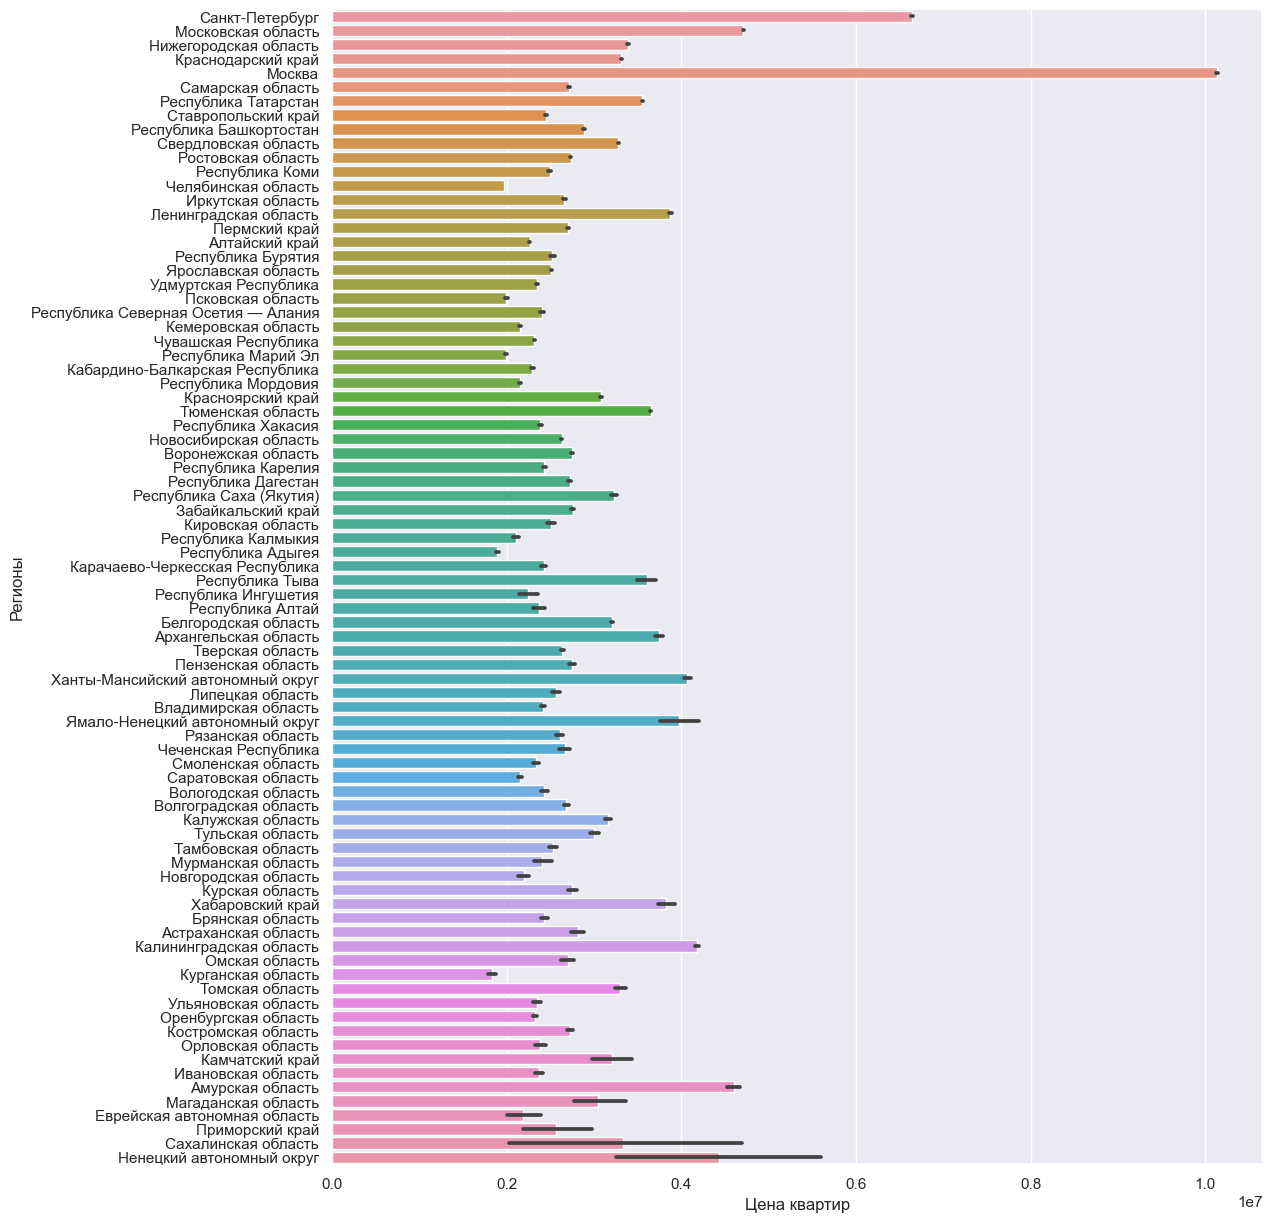

In [83]:
sns.set(rc = {'figure.figsize':(12.0,15.0)})

sns.barplot(x=df['price'], y=df['region_name'])
plt.xlabel('Цена квартир')
plt.ylabel('Регионы')

Визуализирцем график по стоимости квартир.

Text(0, 0.5, 'Density')

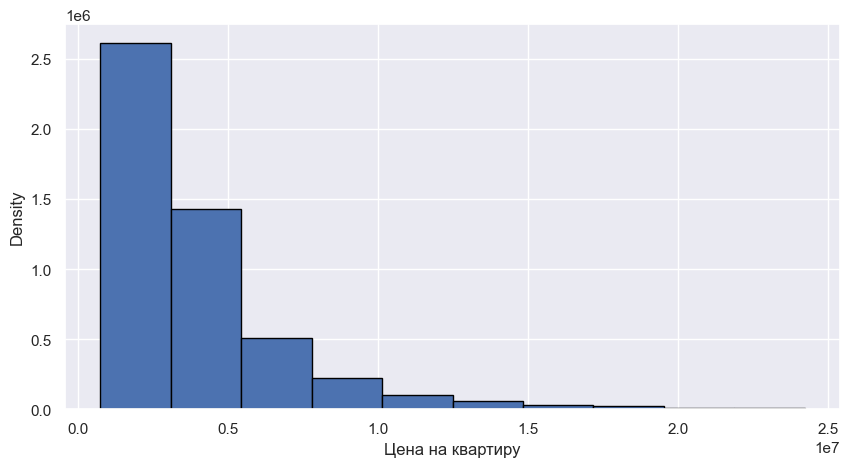

In [85]:
plt.figure(figsize=(10,5))
plt.hist(df["price"], ec='black')
plt.xlabel('Цена на квартиру')
plt.ylabel('Density')

График и значения относительно слабо, но подчиняется закону нормального распределения

Визуализирцем график по стоимости квартир.

C:\Users\mrrr_\AppData\Local\Temp\ipykernel_20332\2778742769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"], kde=True)


Text(0, 0.5, 'Density')

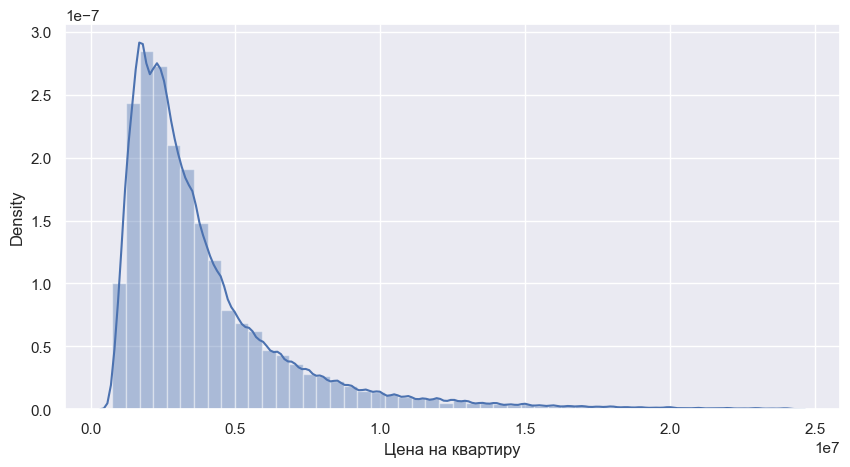

In [86]:
plt.figure(figsize=(10,5))  
sns.distplot(df["price"], kde=True)
plt.xlabel('Цена на квартиру')
plt.ylabel('Density')

График и значения относительно слабо, но подчиняется закону нормального распределения. Заметна асимметрия.

Определим значение ассиметрии для столбца 'price'

In [87]:
df['price'].skew()

2.426673318271481

Наблюдается асиметричность значений. Найдем коэффициент ассиметрии прологарифмированных данных.

In [90]:
y_log = np.log(df['price'])
y_log.skew()

0.44509004478811914

Построим график с помощью логарифмированных значений

C:\Users\mrrr_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


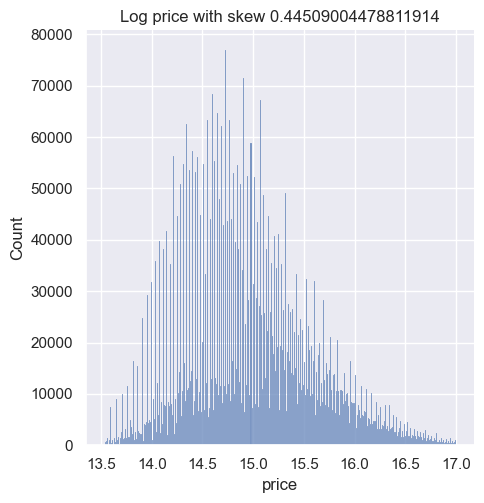

In [91]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

Теперь график принял более правильную форму (колокольчика) без явных выбросов

# Предсказание значений

Построение модели регрессии

In [160]:
df_spb

,price,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000.0,1,8,10,3,82.6,10.8,1
7,3600000.0,1,2,5,1,31.1,6.0,1
36,3200000.0,1,7,9,1,31.0,7.0,1
47,6500000.0,3,3,3,3,89.0,10.0,1
54,6300000.0,3,5,5,2,99.9,14.5,1
...,...,...,...,...,...,...,...,...
5476898,6550000.0,2,7,22,2,50.0,9.0,1
5476909,8000000.0,1,5,9,3,60.0,6.2,1
5476937,12500000.0,1,1,9,3,67.0,6.0,1
5476964,9600000.0,3,3,6,3,62.0,8.6,1


In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_spb.drop(columns=['price','building_type','level','levels','object_type'])  # Признаки
y = df_spb['price']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [163]:
# Коэффициенты регрессии и свободный член
coefficients = model.coef_
intercept = model.intercept_
print("Коэффициенты регрессии:", coefficients)
print("Свободный член:", intercept)

Коэффициенты регрессии: [-675344.79045562  142006.50430606  112271.11264225]
Свободный член: -946947.2315747822


In [164]:
# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка среднеквадратической ошибки модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратическая ошибка:", mse)

Среднеквадратическая ошибка: 4511416544702.948


In [165]:
from sklearn.ensemble import RandomForestRegressor

# Создание и обучение модели случайного леса
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
forest_y_pred = forest_model.predict(X_test)

# Оценка среднеквадратической ошибки модели случайного леса
forest_mse = mean_squared_error(y_test, forest_y_pred)
print("Среднеквадратическая ошибка случайного леса:", forest_mse)

Среднеквадратическая ошибка случайного леса: 3260873617020.994


In [168]:
import xgboost as xgb

# Создание и обучение модели градиентного бустинга
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
xgb_y_pred = xgb_model.predict(X_test)

# Оценка среднеквадратической ошибки модели градиентного бустинга
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
print("Среднеквадратическая ошибка градиентного бустинга:", xgb_mse)


Среднеквадратическая ошибка градиентного бустинга: 3894483174758.3354


In [169]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=0.95)  # Оставляем достаточное количество компонент, чтобы сохранить 95% дисперсии
X_pca = pca.fit_transform(X_scaled)

# Разделение данных на обучающий и тестовый наборы
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Создание и обучение модели на данных PCA
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Предсказание на тестовом наборе данных
y_pred_pca = model_pca.predict(X_test_pca)

# Оценка среднеквадратической ошибки модели на данных PCA
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("Среднеквадратическая ошибка модели на данных PCA:", mse_pca)


Среднеквадратическая ошибка модели на данных PCA: 5229221416577.534
